In [77]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords as stwd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns



In [3]:
new=pd.read_csv('G:\\kittu_data\\spam.csv',encoding =  "ISO-8859-1")

In [4]:
data=new[['v1','v2']]

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.rename(columns={'v1':'spam','v2':'message'},inplace=True)

C:\Users\Akshay Kumawat\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
data=pd.get_dummies(data,columns=['spam'],drop_first=True)

In [8]:
data.rename(columns={'spam_spam':'spam'},inplace=True)

In [9]:
data.head()

,message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


PREPROCESSING DATA

In [10]:
final=[]
words=stwd.words('english')
for i in range(len(data)):
    x=re.sub('[^a-z A-Z]','',data.loc[i]['message'])
    x=x.lower()
    tokens=wt(x)
    temp=[]
    for i in tokens:
        if i not in words:
            temp.append(str(i))
        
    x=" ".join(temp)
    final.append(x)
        
    
    
    

STORED CLEANED COLUMNS (i.e "message") in x as DataFrame

In [11]:
m=pd.DataFrame(final)
len(m)
len(data)
m


,0
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah dont think goes usf lives around though
...,...
5567,nd time tried contact u u pound prize claim ea...
5568,b going esplanade fr home
5569,pity mood soany suggestions
5570,guy bitching acted like id interested buying s...


performing test split

In [12]:
v=CountVectorizer()

In [13]:
v.fit_transform(m[0])

<5572x8386 sparse matrix of type '<class 'numpy.int64'>'
	with 45451 stored elements in Compressed Sparse Row format>

In [17]:
mat=v.fit_transform(m[0]).toarray()


In [18]:
dat=pd.DataFrame(mat,columns=v.get_feature_names())

In [19]:
dat['spam']=data['spam']

In [24]:
dat.head()

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
tv=TfidfTransformer()

In [40]:
temp1=tv.fit_transform(dat.drop(columns='spam')).toarray()

In [83]:
new=pd.DataFrame(temp1,columns=dat.drop(columns='spam').columns)

In [88]:
new['spam']=dat['spam']

In [59]:
from sklearn.linear_model import LogisticRegression 

In [60]:
from sklearn.model_selection import train_test_split

In [89]:
x=new.drop(columns='spam')
y=new['spam']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7)

In [90]:
lr=LogisticRegression()

In [91]:
lr.fit(x_train,y_train)

LogisticRegression()

In [92]:
pre=lr.predict(x_test)

In [93]:
import sklearn.metrics as m 

In [94]:
m.accuracy_score(pre,y_test)

0.9146372724942322

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
res=confusion_matrix(y_test,pre)

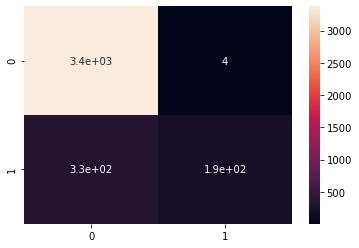

In [97]:
sns.heatmap(res,annot=True)